In [10]:
# pip install -r requirements.txt

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Create the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set dimensions
length = 100
width = 50

# Plot the field
ax.set_xlim(0, width)
ax.set_ylim(0, length)
ax.set_zlim(0, 10)

# Load the player image
player_img = plt.imread('player.png')  # Replace with path to your image

# Plot the image at the center of the field
im = OffsetImage(player_img, zoom=0.1)
ab = AnnotationBbox(im, (width / 2, length / 2), xycoords='data', frameon=False)
ax.add_artist(ab)

# Show the plot
plt.show()


ValueError: Image size of 50269x100180 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

## Compétitions and global informations


In [12]:
from statsbombpy import sb
competition = sb.competitions()
men_competition = competition[competition['competition_gender']=='male']
men_UEFA_Euro = men_competition[men_competition['competition_name']=='UEFA Euro']

c:\Users\antoi\Documents\Work_Learn\Football-Soccer-DataViz\.venv\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [13]:
competition

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596


In [14]:
competition.columns

Index(['competition_id', 'season_id', 'country_name', 'competition_name',
       'competition_gender', 'competition_youth', 'competition_international',
       'season_name', 'match_updated', 'match_updated_360',
       'match_available_360', 'match_available'],
      dtype='object')

In [15]:
competition['competition_name'].str.replace(r'^1\.\s*', '', regex=True).unique()

array(['Bundesliga', 'African Cup of Nations', 'Champions League',
       'Copa America', 'Copa del Rey', "FA Women's Super League",
       'FIFA U20 World Cup', 'FIFA World Cup', 'Indian Super league',
       'La Liga', 'Liga Profesional', 'Ligue 1', 'Major League Soccer',
       'North American League', 'NWSL', 'Premier League', 'Serie A',
       'UEFA Euro', 'UEFA Europa League', "UEFA Women's Euro",
       "Women's World Cup"], dtype=object)

In [16]:
men_UEFA_Euro

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
68,55,282,Europe,UEFA Euro,male,False,True,2024,2024-07-15T15:48:50.315500,2024-07-15T15:52:24.778809,2024-07-15T15:52:24.778809,2024-07-15T15:48:50.315500
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402


In [17]:
competition_id = men_UEFA_Euro['competition_id'].iloc[0]
season_id = men_UEFA_Euro['season_id'].iloc[0]
matches_men_UEFA_Euro = sb.matches(competition_id=competition_id, season_id=season_id)


c:\Users\antoi\Documents\Work_Learn\Football-Soccer-DataViz\.venv\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [18]:
matches_men_UEFA_Euro.head(3)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3942819,2024-07-10,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,England,1,2,available,...,2024-07-15T07:57:36.684453,6,Semi-finals,Signal-Iduna-Park,Felix Zwayer,Ronald Koeman,Gareth Southgate,1.1.0,2,2
1,3943043,2024-07-14,22:00:00.000,Europe - UEFA Euro,2024,Spain,England,2,1,available,...,2024-07-15T15:52:24.778809,7,Final,Olympiastadion Berlin,François Letexier,Luis de la Fuente Castillo,Gareth Southgate,1.1.0,2,2
2,3942752,2024-07-09,22:00:00.000,Europe - UEFA Euro,2024,Spain,France,2,1,available,...,2024-07-10T13:01:26.597509,6,Semi-finals,Allianz Arena,Slavko Vinčić,Luis de la Fuente Castillo,Didier Deschamps,1.1.0,2,2


In [19]:
matches_men_UEFA_Euro.columns

Index(['match_id', 'match_date', 'kick_off', 'competition', 'season',
       'home_team', 'away_team', 'home_score', 'away_score', 'match_status',
       'match_status_360', 'last_updated', 'last_updated_360', 'match_week',
       'competition_stage', 'stadium', 'referee', 'home_managers',
       'away_managers', 'data_version', 'shot_fidelity_version',
       'xy_fidelity_version'],
      dtype='object')

## Lineups (global match data informations)

In [20]:
match_id = 3942819
team = 'England'
team = 'Netherlands'
lineups = sb.lineups(match_id=match_id)[team]
lineups

c:\Users\antoi\Documents\Work_Learn\Football-Soccer-DataViz\.venv\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,player_id,player_name,player_nickname,jersey_number,country,cards,positions
0,2988,Memphis Depay,None,10,Netherlands,[],"[{'position_id': 23, 'position': 'Center Forwa..."
1,3306,Nathan Aké,None,5,Netherlands,[],"[{'position_id': 6, 'position': 'Left Back', '..."
2,3311,Daley Blind,None,17,Netherlands,[],[]
3,3567,Georginio Wijnaldum,None,8,Netherlands,[],[]
4,3669,Virgil van Dijk,None,4,Netherlands,"[{'time': '86:26', 'card_type': 'Yellow Card',...","[{'position_id': 5, 'position': 'Left Center B..."
5,7787,Stefan de Vrij,None,6,Netherlands,[],"[{'position_id': 3, 'position': 'Right Center ..."
6,7829,Wout Weghorst,None,9,Netherlands,[],"[{'position_id': 23, 'position': 'Center Forwa..."
7,8069,Matthijs de Ligt,None,3,Netherlands,[],[]
8,8125,Denzel Dumfries,None,22,Netherlands,"[{'time': '13:43', 'card_type': 'Yellow Card',...","[{'position_id': 2, 'position': 'Right Back', ..."
9,8259,Steven Bergwijn,None,25,Netherlands,[],[]


In [21]:
lineups['positions'].iloc[1]

[{'position_id': 6,
  'position': 'Left Back',
  'from': '00:00',
  'to': None,
  'from_period': 1,
  'to_period': None,
  'start_reason': 'Starting XI',
  'end_reason': 'Final Whistle'}]

## Event (specific match data)

In [22]:
events = sb.events(match_id=match_id)
events

c:\Users\antoi\Documents\Work_Learn\Football-Soccer-DataViz\.venv\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,50_50,bad_behaviour_card,ball_receipt_outcome,block_deflection,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Netherlands,941,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 3421, 'lineup': [{'player': {'id...",England,768,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,England,768,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:00:00.000,Half Start,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:50:09.942,Half End,NaN
3481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,England,768,00:50:09.942,Half End,NaN
3482,NaN,Yellow Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:41:26.052,Bad Behaviour,NaN
3483,NaN,Yellow Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:45:18.606,Bad Behaviour,NaN


In [23]:
events.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'block_deflection', 'block_save_block', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_right_foot', 'counterpress',
       'dribble_outcome', 'duel_outcome', 'duel_type', 'duration',
       'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_penalty', 'foul_won_advantage', 'foul_won_defensive',
       'foul_won_penalty', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_punched_out',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'injury_stoppage_in_chain', 'interception_outcome', 'location',
       'match_id', 'minute', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflected', 'pass_end_location',
       'pass_goal_assis

XG score

In [ ]:
events

In [24]:
events.filter(regex='^pass_type|^team$')

,pass_type,team
0,NaN,Netherlands
1,NaN,England
2,NaN,Netherlands
3,NaN,England
4,NaN,Netherlands
...,...,...
3480,NaN,Netherlands
3481,NaN,England
3482,NaN,Netherlands
3483,NaN,Netherlands


In [25]:
corner_counts = events.filter(regex='^pass_type|^team$').query('pass_type == "Corner"').groupby('team').count()['pass_type']

# Extract the team names from the events DataFrame
teams = events['team'].unique()

# Handle cases where a team might not have any corners
home_corners = corner_counts.get(teams[0], 0)
home_corners

np.int64(3)

In [26]:
events[events['type'] == 'Foul Committed'][['type','team']]
# events['shot_type'].unique()

,type,team
3245,Foul Committed,England
3246,Foul Committed,Netherlands
3247,Foul Committed,Netherlands
3248,Foul Committed,Netherlands
3249,Foul Committed,Netherlands
3250,Foul Committed,Netherlands
3251,Foul Committed,Netherlands
3252,Foul Committed,Netherlands
3253,Foul Committed,England
3254,Foul Committed,England


In [27]:
events.filter(regex='^pass_end_location|^team$').groupby('team').count()

,pass_end_location
team,
England,621
Netherlands,444


In [28]:
events.filter(regex='^shot_statsbomb_xg|^team$').dropna(subset=['shot_statsbomb_xg']).groupby('team').count()

,shot_statsbomb_xg
team,
England,9
Netherlands,7


In [29]:
data = events.filter(regex='^shot_statsbomb_xg|^team$').dropna(subset=['shot_statsbomb_xg'])
# somme_xg_par_pays = data.groupby('team')['shot_statsbomb_xg'].sum()
data = data.groupby('team')['shot_statsbomb_xg'].sum()
home_xg, away_xg = data.iloc[0],data.iloc[1]
home_xg,away_xg

(np.float64(1.253276541), np.float64(0.412172209))

In [30]:
import pandas as pd

def get_normalized_possession(events):
    """
    Extracts and normalizes the possession counts for the two teams from the events DataFrame.

    Parameters:
    - events (pd.DataFrame): DataFrame containing an events column 'possession_team'.

    Returns:
    - home_team_possession (float): Normalized possession percentage for the home team, rounded to one decimal place.
    - away_team_possession (float): Normalized possession percentage for the away team, rounded to one decimal place.
    """
    # Get possession counts
    possession_counts = events['possession_team'].value_counts()
    
    # Get the top two possession teams
    home_team_possession, away_team_possession = possession_counts.iloc[0], possession_counts.iloc[1]
    
    # Calculate total possession
    total_possession = home_team_possession + away_team_possession
    
    # Normalize possession and round to one decimal place
    home_team_possession = round((home_team_possession / total_possession) * 100, 1)
    away_team_possession = round((away_team_possession / total_possession) * 100, 1)
    
    return home_team_possession, away_team_possession

home_possession, away_possession = get_normalized_possession(events)
print(f"Home Team Normalized Possession: {home_possession}%")
print(f"Away Team Normalized Possession: {away_possession}%")


Home Team Normalized Possession: 58.2%
Away Team Normalized Possession: 41.8%


### Shot event

In [31]:
shot_events = events.filter(regex='^(shot|location)').dropna(how='all')
shot_events.head()

,location,shot_aerial_won,shot_body_part,shot_deflected,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type
6,"[60.0, 40.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"[30.4, 24.1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"[30.9, 26.7]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"[60.7, 43.3]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,"[50.1, 16.3]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
shot_events['shot_outcome'].unique()

[{'location': [99.2, 65.4],
  'player': {'id': 15503, 'name': 'Jerdy Schouten'},
  'position': {'id': 9, 'name': 'Right Defensive Midfield'},
  'teammate': True},
 {'location': [101.1, 55.6],
  'player': {'id': 15582, 'name': 'Donyell Malen'},
  'position': {'id': 17, 'name': 'Right Wing'},
  'teammate': True},
 {'location': [117.4, 41.5],
  'player': {'id': 3468, 'name': 'Jordan Pickford'},
  'position': {'id': 1, 'name': 'Goalkeeper'},
  'teammate': False},
 {'location': [94.2, 47.8],
  'player': {'id': 99174, 'name': 'Kobbie Mainoo'},
  'position': {'id': 9, 'name': 'Right Defensive Midfield'},
  'teammate': False},
 {'location': [98.6, 54.1],
  'player': {'id': 3943, 'name': 'Declan Rice'},
  'position': {'id': 11, 'name': 'Left Defensive Midfield'},
  'teammate': False},
 {'location': [101.7, 59.4],
  'player': {'id': 3308, 'name': 'Kieran Trippier'},
  'position': {'id': 8, 'name': 'Left Wing Back'},
  'teammate': False},
 {'location': [102.9, 50.5],
  'player': {'id': 3244, 'nam

In [32]:
shot_events[shot_events['shot_end_location'].notna()].head()

,location,shot_aerial_won,shot_body_part,shot_deflected,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type
3440,"[99.6, 51.2]",NaN,Right Foot,NaN,"[120.0, 37.4, 2.0]",NaN,"[{'location': [99.2, 65.4], 'player': {'id': 1...",NaN,Goal,0.048935,Normal,Open Play
3441,"[88.2, 36.6]",NaN,Right Foot,NaN,"[118.3, 37.6, 0.3]",NaN,"[{'location': [85.6, 34.3], 'player': {'id': 2...",4a358d4e-38be-49ad-be11-88be3a5ba2b5,Saved,0.028932,Normal,Open Play
3442,"[104.5, 41.6]",NaN,Left Foot,NaN,"[106.2, 41.7]",NaN,"[{'location': [109.9, 30.6], 'player': {'id': ...",77745ccb-a216-4d78-bd2c-4b0d8459b35b,Blocked,0.071750,Normal,Open Play
3443,"[108.1, 40.0]",NaN,Right Foot,NaN,"[120.0, 36.5, 0.2]",NaN,NaN,NaN,Goal,0.783500,Normal,Penalty
3444,"[117.0, 47.6]",NaN,Right Foot,NaN,"[117.7, 46.1, 0.3]",NaN,"[{'location': [108.5, 26.2], 'player': {'id': ...",47e2a779-1c5a-40cf-b729-0f8ac5c3bae3,Saved,0.188995,Normal,Open Play


In [50]:
shot_events_location['location'].tolist()

[[99.6, 51.2],
 [88.2, 36.6],
 [104.5, 41.6],
 [108.1, 40.0],
 [117.0, 47.6],
 [102.9, 45.1],
 [111.3, 43.4],
 [95.8, 51.6],
 [98.4, 50.6],
 [98.8, 52.9],
 [109.5, 33.3],
 [111.1, 44.6],
 [110.4, 38.9],
 [103.5, 45.0],
 [104.8, 50.4],
 [110.4, 53.5]]

In [33]:
import pandas as pd
shot_events_location = shot_events[shot_events['shot_end_location'].notna()]
shot_events_location[['shot_end_location_x', 'shot_end_location_y', 'shot_end_location_z']] = pd.DataFrame(shot_events_location['shot_end_location'].tolist(), index=shot_events_location.index)
shot_events_location[['shot_start_location_x', 'shot_start_location_y']] = pd.DataFrame(shot_events_location['location'].tolist(), index=shot_events_location.index)
shot_events_location

C:\Users\antoi\AppData\Local\Temp\ipykernel_28620\2183318846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shot_events_location[['shot_end_location_x', 'shot_end_location_y', 'shot_end_location_z']] = pd.DataFrame(shot_events_location['shot_end_location'].tolist(), index=shot_events_location.index)
C:\Users\antoi\AppData\Local\Temp\ipykernel_28620\2183318846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shot_events_location[['shot_end_location_x', 'shot_end_location_y', 'shot_end_location_z']] =

,location,shot_aerial_won,shot_body_part,shot_deflected,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,shot_end_location_x,shot_end_location_y,shot_end_location_z,shot_start_location_x,shot_start_location_y
3440,"[99.6, 51.2]",NaN,Right Foot,NaN,"[120.0, 37.4, 2.0]",NaN,"[{'location': [99.2, 65.4], 'player': {'id': 1...",NaN,Goal,0.048935,Normal,Open Play,120.0,37.4,2.0,99.6,51.2
3441,"[88.2, 36.6]",NaN,Right Foot,NaN,"[118.3, 37.6, 0.3]",NaN,"[{'location': [85.6, 34.3], 'player': {'id': 2...",4a358d4e-38be-49ad-be11-88be3a5ba2b5,Saved,0.028932,Normal,Open Play,118.3,37.6,0.3,88.2,36.6
3442,"[104.5, 41.6]",NaN,Left Foot,NaN,"[106.2, 41.7]",NaN,"[{'location': [109.9, 30.6], 'player': {'id': ...",77745ccb-a216-4d78-bd2c-4b0d8459b35b,Blocked,0.071750,Normal,Open Play,106.2,41.7,NaN,104.5,41.6
3443,"[108.1, 40.0]",NaN,Right Foot,NaN,"[120.0, 36.5, 0.2]",NaN,NaN,NaN,Goal,0.783500,Normal,Penalty,120.0,36.5,0.2,108.1,40.0
3444,"[117.0, 47.6]",NaN,Right Foot,NaN,"[117.7, 46.1, 0.3]",NaN,"[{'location': [108.5, 26.2], 'player': {'id': ...",47e2a779-1c5a-40cf-b729-0f8ac5c3bae3,Saved,0.188995,Normal,Open Play,117.7,46.1,0.3,117.0,47.6
3445,"[102.9, 45.1]",NaN,Left Foot,NaN,"[103.8, 44.7]",True,"[{'location': [94.5, 59.9], 'player': {'id': 3...",687e4c45-2daf-45b6-af63-82bbea978520,Blocked,0.039829,Normal,Open Play,103.8,44.7,NaN,102.9,45.1
3446,"[111.3, 43.4]",True,Head,NaN,"[120.0, 42.7, 2.8]",NaN,"[{'location': [115.5, 77.4], 'player': {'id': ...",87a672a3-b150-4a14-8367-40507453377d,Post,0.063159,Normal,Open Play,120.0,42.7,2.8,111.3,43.4
3447,"[95.8, 51.6]",NaN,Left Foot,NaN,"[120.0, 36.0, 2.6]",NaN,"[{'location': [103.6, 34.7], 'player': {'id': ...",a7123605-b81f-4b72-8cc6-d672ebce679c,Post,0.028711,Normal,Open Play,120.0,36.0,2.6,95.8,51.6
3448,"[98.4, 50.6]",NaN,Left Foot,NaN,"[119.2, 37.1, 0.3]",True,"[{'location': [95.2, 40.7], 'player': {'id': 3...",a5003341-7686-475c-b474-2f6c4f0c379a,Saved,0.034638,Normal,Open Play,119.2,37.1,0.3,98.4,50.6
3449,"[98.8, 52.9]",NaN,Right Foot,NaN,"[102.5, 50.9]",NaN,"[{'location': [95.9, 25.7], 'player': {'id': 2...",NaN,Blocked,0.029810,Normal,Open Play,102.5,50.9,NaN,98.8,52.9


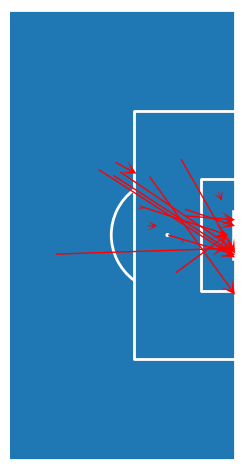

In [34]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch

# Initialize the pitch, focusing on half of it
pitch = Pitch(pitch_color='#1f77b4', line_color='white', stripe=False, pitch_type='statsbomb')
fig, ax = pitch.draw()

# Set the x and y limits to focus on half of the pitch (from the halfway line to the goal)
ax.set_xlim([80, 120])
ax.set_ylim([0, 80])

# Loop through each shot and draw an arrow from the start location to the end location
for _, shot in shot_events_location.iterrows():
    pitch.arrows(shot['shot_start_location_x'], shot['shot_start_location_y'],
                 shot['shot_end_location_x'], shot['shot_end_location_y'],
                 width=1, headwidth=10, headlength=10, color='red', ax=ax)

plt.show()


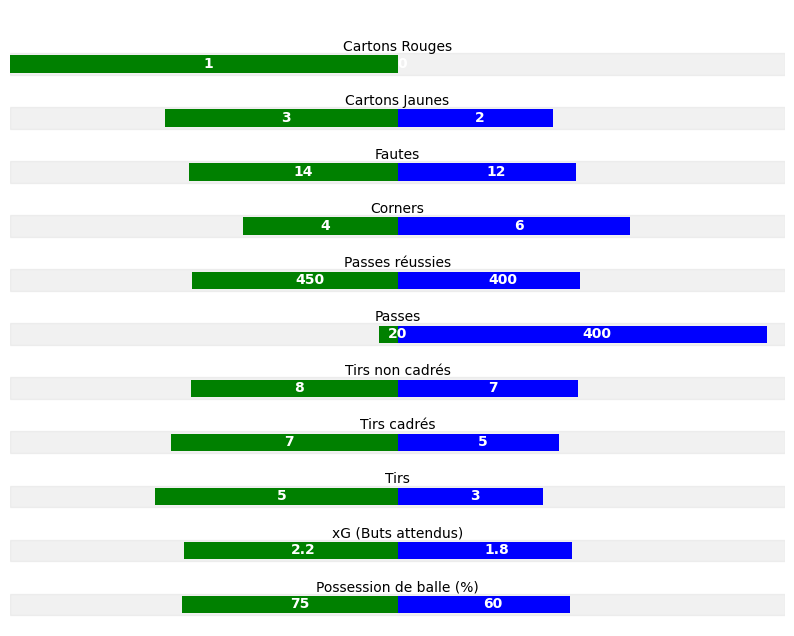

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Données des équipes
teams = ['Home Team', 'Away Team']
categories_scores = [
    {"catégorie": "Possession de balle (%)", "Home Team": 60, "Away Team": 75},
    {"catégorie": "xG (Buts attendus)", "Home Team": 1.8, "Away Team": 2.2},
    {"catégorie": "Tirs", "Home Team": 3, "Away Team": 5},
    {"catégorie": "Tirs cadrés", "Home Team": 5, "Away Team": 7},
    {"catégorie": "Tirs non cadrés", "Home Team": 7, "Away Team": 8},
    {"catégorie": "Passes", "Home Team": 400, "Away Team": 20},
    {"catégorie": "Passes réussies", "Home Team": 400, "Away Team": 450},
    {"catégorie": "Corners", "Home Team": 6, "Away Team": 4},
    {"catégorie": "Fautes", "Home Team": 12, "Away Team": 14},
    {"catégorie": "Cartons Jaunes", "Home Team": 2, "Away Team": 3},
    {"catégorie": "Cartons Rouges", "Home Team": 0, "Away Team": 1},
]

categories = [entry['catégorie'] for entry in categories_scores]
home_scores = [entry['Home Team'] for entry in categories_scores]
away_scores = [entry['Away Team'] for entry in categories_scores]

# Normalisation des scores pour chaque catégorie
home_normalized = []
away_normalized = []

for home, away in zip(home_scores, away_scores):
    total = home + away
    home_normalized.append((home / total) * 100)
    away_normalized.append((away / total) * 100)

# Augmenter l'espacement entre les barres en multipliant y_pos par un facteur
spacing_factor = 2.5  # Ajustez cette valeur pour augmenter ou diminuer l'espacement
y_pos = np.arange(len(categories)) * spacing_factor

# Tracé
fig, ax = plt.subplots(figsize=(10, 8))

# Ajout des fonds gris légers pour chaque catégorie
for i in range(len(categories)):
    ax.add_patch(plt.Rectangle((-100, y_pos[i] - 0.5), 200, 1, color='lightgray', alpha=0.3))

# Tracé des scores normalisés des deux équipes
ax.barh(y_pos, home_normalized, color='blue', align='center', label='Home Team')
ax.barh(y_pos, [-score for score in away_normalized], color='green', align='center', label='Away Team')

# Centrage des noms des catégories
for i in range(len(categories)):
    ax.text(0, y_pos[i]+0.8, categories[i], ha='center', va='center', fontsize=10)

# Ajout des valeurs non normalisées à l'extrémité des barres
for i in range(len(categories)):
    ax.text(home_normalized[i] / 2, y_pos[i], f'{home_scores[i]}', va='center', color='white', fontweight='bold')
    ax.text(-away_normalized[i] / 2, y_pos[i], f'{away_scores[i]}', va='center', color='white', fontweight='bold')

# Ajustement des limites des axes
ax.set_xlim(-100, 100)
ax.set_ylim(-1, max(y_pos) + spacing_factor)

# Cacher les spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Suppression des y-ticks et x-ticks
ax.set_yticks([])
ax.set_xticks([])

# Affichage du graphique
plt.show()


In [36]:
df_filtered = events[events['location'].notna()]
player_positions = df_filtered[['timestamp','player', 'position', 'location']]
player_positions


,timestamp,player,position,location
6,00:00:00.355,Kobbie Mainoo,Right Defensive Midfield,"[60.0, 40.0]"
7,00:00:05.294,Jordan Pickford,Goalkeeper,"[30.4, 24.1]"
8,00:00:08.732,Virgil van Dijk,Left Center Back,"[30.9, 26.7]"
9,00:00:11.552,John Stones,Center Back,"[60.7, 43.3]"
10,00:00:23.802,Nathan Aké,Left Back,"[50.1, 16.3]"
...,...,...,...,...
3455,00:45:00.296,Ollie Watkins,Center Forward,"[110.4, 53.5]"
3463,00:23:35.255,NaN,NaN,"[16.0, 6.7]"
3464,00:23:35.529,NaN,NaN,"[104.1, 73.4]"
3465,00:25:05.276,Phil Foden,Right Attacking Midfield,"[91.0, 23.3]"


### pitch display

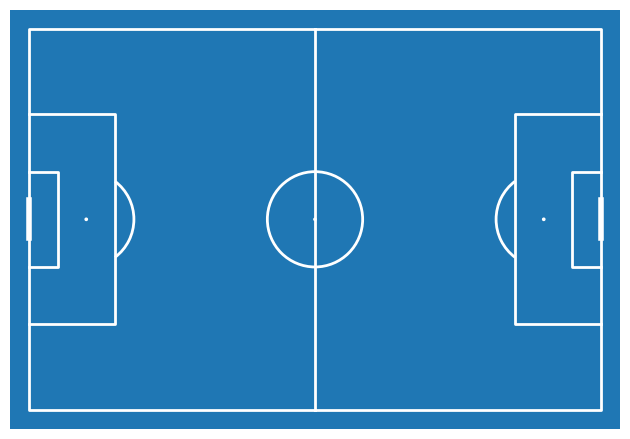

In [37]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt
# pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)
pitch = Pitch(pitch_color='#1f77b4', 
              line_color='white', 
              stripe=False,
              pitch_type = 'statsbomb',
              )
fig, ax = pitch.draw()
plt.show()

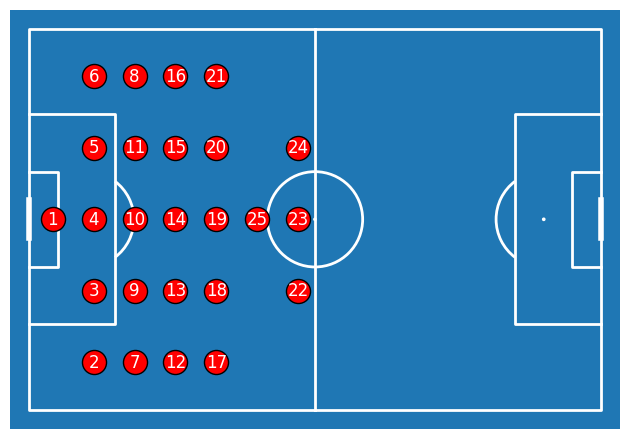

In [38]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt

pitch_width = 120
pitch_height = 80
nb_line = 7
space_line = (pitch_width/2)/7
space_col = (pitch_height)/7

x_line1 = 5
x_line2 = x_line1 + space_line
x_line3 = x_line2 + space_line
x_line4 = x_line3 + space_line
x_line5 = x_line4 + space_line
x_line6 = x_line5 + space_line
x_line7 = x_line6 + space_line

x_col1 = 5
x_col2 = x_line1 + space_line
x_col3 = x_line2 + space_line
x_col4 = x_line3 + space_line
x_col5 = x_line4 + space_line
x_col6 = x_line5 + space_line
x_col7 = x_line6 + space_line

coordinates_dict = {
    1: (x_line1, 40),
    2: (x_line2, 70),
    3: (x_line2, 55),
    4: (x_line2, 40),
    5: (x_line2, 25),
    6: (x_line2, 10),
    7: (x_line3, 70),
    8: (x_line3, 10),
    9: (x_line3, 55),
    10: (x_line3, 40),
    11: (x_line3, 25),
    12: (x_line4, 70),
    13: (x_line4, 55),
    14: (x_line4, 40),
    15: (x_line4, 25),
    16: (x_line4, 10),
    17: (x_line5, 70),
    18: (x_line5, 55),
    19: (x_line5, 40),
    20: (x_line5, 25),
    21: (x_line5, 10),
    22: (x_line7, 55),
    23: (x_line7, 40),
    24: (x_line7, 25),
    25: (x_line6, 40)
}

# Plotting the pitch
pitch = Pitch(
    pitch_color='#1f77b4', 
    line_color='white', 
    stripe=False, 
    pitch_type='statsbomb'
)

fig, ax = pitch.draw()

# Plotting player positions as scatter points
x_coords, y_coords = zip(*coordinates_dict.values())
ax.scatter(x_coords, y_coords, color='red', s=300, edgecolors='black', zorder=5)

# Annotating player numbers
for player_num, (x, y) in coordinates_dict.items():
    ax.text(x, y, str(player_num), color='white', ha='center', va='center', fontsize=12, zorder=6)

plt.show()


In [39]:
lineups

,player_id,player_name,player_nickname,jersey_number,country,cards,positions
0,2988,Memphis Depay,None,10,Netherlands,[],"[{'position_id': 23, 'position': 'Center Forwa..."
1,3306,Nathan Aké,None,5,Netherlands,[],"[{'position_id': 6, 'position': 'Left Back', '..."
2,3311,Daley Blind,None,17,Netherlands,[],[]
3,3567,Georginio Wijnaldum,None,8,Netherlands,[],[]
4,3669,Virgil van Dijk,None,4,Netherlands,"[{'time': '86:26', 'card_type': 'Yellow Card',...","[{'position_id': 5, 'position': 'Left Center B..."
5,7787,Stefan de Vrij,None,6,Netherlands,[],"[{'position_id': 3, 'position': 'Right Center ..."
6,7829,Wout Weghorst,None,9,Netherlands,[],"[{'position_id': 23, 'position': 'Center Forwa..."
7,8069,Matthijs de Ligt,None,3,Netherlands,[],[]
8,8125,Denzel Dumfries,None,22,Netherlands,"[{'time': '13:43', 'card_type': 'Yellow Card',...","[{'position_id': 2, 'position': 'Right Back', ..."
9,8259,Steven Bergwijn,None,25,Netherlands,[],[]


In [40]:
def display_player_names_and_positions(lineups):
    for index, row in lineups.iterrows():
        player_name = row['player_name']
        # Extracting the first position ID from the positions column (assuming only one position)
        position_info = row['positions'][0] if row['positions'] else {}
        position_id = position_info.get('position_id', 'Unknown')
        print(f"Player: {player_name}, Position ID: {position_id}")

# Example usage with the provided lineups
display_player_names_and_positions(lineups)


Player: Memphis Depay, Position ID: 23
Player: Nathan Aké, Position ID: 6
Player: Daley Blind, Position ID: Unknown
Player: Georginio Wijnaldum, Position ID: Unknown
Player: Virgil van Dijk, Position ID: 5
Player: Stefan de Vrij, Position ID: 3
Player: Wout Weghorst, Position ID: 23
Player: Matthijs de Ligt, Position ID: Unknown
Player: Denzel Dumfries, Position ID: 2
Player: Steven Bergwijn, Position ID: Unknown
Player: Jerdy Schouten, Position ID: 9
Player: Donyell Malen, Position ID: 17
Player: Justin Bijlow, Position ID: Unknown
Player: Cody Mathès Gakpo, Position ID: 21
Player: Tijjani Reijnders, Position ID: 11
Player: Joey Veerman, Position ID: 23
Player: Brian Brobbey, Position ID: 17
Player: Lutsharel Geertruida, Position ID: Unknown
Player: Ryan Gravenberch, Position ID: Unknown
Player: Mark Flekken, Position ID: Unknown
Player: Micky van de Ven, Position ID: Unknown
Player: Jeremie Frimpong, Position ID: Unknown
Player: Joshua Zirkzee, Position ID: 2
Player: Bart Verbruggen,

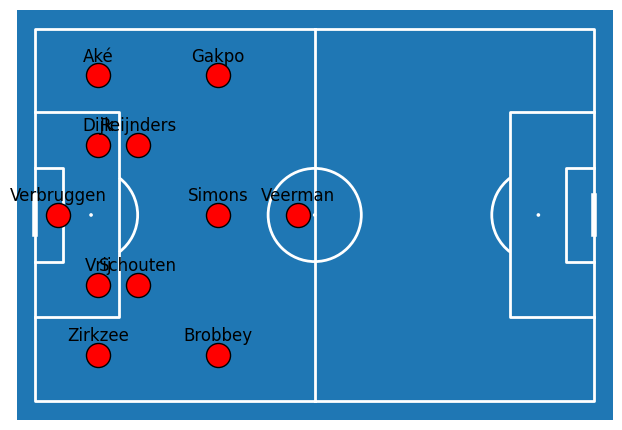

In [41]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt

# Assuming the position IDs map to coordinates like this:
position_id_to_coordinates = {
    1: (x_line1, 40),
    2: (x_line2, 70),
    3: (x_line2, 55),
    4: (x_line2, 40),
    5: (x_line2, 25),
    6: (x_line2, 10),
    7: (x_line3, 70),
    8: (x_line3, 10),
    9: (x_line3, 55),
    10: (x_line3, 40),
    11: (x_line3, 25),
    12: (x_line4, 70),
    13: (x_line4, 55),
    14: (x_line4, 40),
    15: (x_line4, 25),
    16: (x_line4, 10),
    17: (x_line5, 70),
    18: (x_line5, 55),
    19: (x_line5, 40),
    20: (x_line5, 25),
    21: (x_line5, 10),
    22: (x_line7, 55),
    23: (x_line7, 40),
    24: (x_line7, 25),
    25: (x_line6, 40)
}


def display_player_names_and_positions(lineups):
    coordinates_dict = {}
    player_names_dict = {}
    
    for index, row in lineups.iterrows():
        player_name = row['player_name']
        # Extracting the first position ID from the positions column
        position_info = row['positions'][0] if row['positions'] else {}
        position_id = position_info.get('position_id', 'Unknown')
        
        if position_id in position_id_to_coordinates:
            coordinates_dict[position_id] = position_id_to_coordinates[position_id]
            player_names_dict[position_id] = player_name
    
    # Plotting the pitch
    pitch = Pitch(
        pitch_color='#1f77b4', 
        line_color='white', 
        stripe=False, 
        pitch_type='statsbomb'
    )

    fig, ax = pitch.draw()

    # Plotting player positions as scatter points
    x_coords, y_coords = zip(*coordinates_dict.values())
    ax.scatter(x_coords, y_coords, color='red', s=300, edgecolors='black', zorder=5)

    # Annotating player names and position IDs
    for position_id, (x, y) in coordinates_dict.items():
        name = player_names_dict.get(position_id, "Unknown")
        ax.text(x, y - 4, f'{name.split()[-1]}', color='black', ha='center', va='center', fontsize=12, zorder=6)

    plt.show()

# Example usage with the provided lineups
display_player_names_and_positions(lineups)


## scrap

In [42]:
# import requests
# from bs4 import BeautifulSoup

# # URL of the page to scrape
# url = 'https://fbref.com/fr/joueurs/Aa'

# # Send a GET request to the webpage
# response = requests.get(url)

# # Parse the content of the page
# soup = BeautifulSoup(response.content, 'html.parser')

# # Find all 'a' tags within the 'section_content' div
# section_content = soup.find('div', {'class': 'section_content'})
# player_links = section_content.find_all('a')

# # Extract and print the href attribute of each 'a' tag
# for link in player_links:
#     print(link.get('href'))

# # If you want to save these URLs to a file:
# with open('player_urls.txt', 'w') as file:
#     for link in player_links:
#         file.write(f"https://fbref.com{link.get('href')}\n")


/fr/joueurs/aa/
/fr/joueurs/ab/
/fr/joueurs/ac/
/fr/joueurs/ad/
/fr/joueurs/af/
/fr/joueurs/ag/
/fr/joueurs/ah/
/fr/joueurs/ai/
/fr/joueurs/aj/
/fr/joueurs/ak/
/fr/joueurs/am/
/fr/joueurs/an/
/fr/joueurs/ao/
/fr/joueurs/ap/
/fr/joueurs/aq/
/fr/joueurs/ar/
/fr/joueurs/as/
/fr/joueurs/at/
/fr/joueurs/au/
/fr/joueurs/aw/
/fr/joueurs/ax/
/fr/joueurs/ay/
/fr/joueurs/az/
/fr/joueurs/ba/
/fr/joueurs/bb/
/fr/joueurs/be/
/fr/joueurs/bg/
/fr/joueurs/bh/
/fr/joueurs/bi/
/fr/joueurs/bj/
/fr/joueurs/bk/
/fr/joueurs/bl/
/fr/joueurs/bn/
/fr/joueurs/bo/
/fr/joueurs/br/
/fr/joueurs/bs/
/fr/joueurs/bt/
/fr/joueurs/bv/
/fr/joueurs/bw/
/fr/joueurs/by/
/fr/joueurs/bz/
/fr/joueurs/cc/
/fr/joueurs/cd/
/fr/joueurs/ce/
/fr/joueurs/ch/
/fr/joueurs/ci/
/fr/joueurs/cl/
/fr/joueurs/cm/
/fr/joueurs/co/
/fr/joueurs/cr/
/fr/joueurs/cs/
/fr/joueurs/cv/
/fr/joueurs/cw/
/fr/joueurs/cy/
/fr/joueurs/cz/
/fr/joueurs/da/
/fr/joueurs/db/
/fr/joueurs/dc/
/fr/joueurs/de/
/fr/joueurs/dg/
/fr/joueurs/dh/
/fr/joueurs/di/
/fr/joue

In [43]:
# import requests
# from bs4 import BeautifulSoup
# import time

# # Starting URL
# base_url = 'https://fbref.com'
# start_url = f'{base_url}/fr/joueurs/aa/'

# # A set to keep track of visited URLs to avoid duplicates
# visited_urls = set()

# # A list to store player URLs
# player_urls = []

# def scrape_page(url):
#     # Check if we've already visited this URL
#     if url in visited_urls:
#         return
#     visited_urls.add(url)
    
#     # Request the page content
#     response = requests.get(url)
#     soup = BeautifulSoup(response.content, 'html.parser')
    
#     # Find all player links on the page
#     section_content = soup.find('div', {'class': 'section_content'})
#     if section_content:
#         for link in section_content.find_all('a', href=True):
#             href = link.get('href')
#             if href.startswith('/fr/joueurs/'):
#                 full_url = f"{base_url}{href}"
#                 player_urls.append(full_url)
#                 print(full_url)
    
#     # Find pagination links to continue scraping other pages
#     pagination_links = soup.find_all('a', href=True)
#     for link in pagination_links:
#         href = link.get('href')
#         if href.startswith('/fr/joueurs/aa/') and href not in visited_urls:
#             scrape_page(f"{base_url}{href}")

# # Start scraping from the initial URL
# scrape_page(start_url)

# # Optionally, save the player URLs to a file
# with open('all_player_urls.txt', 'w') as file:
#     for url in player_urls:
#         file.write(url + '\n')

# print(f"Total player URLs found: {len(player_urls)}")


https://fbref.com/fr/joueurs/9c60f681/Ahmad-Aadi
https://fbref.com/fr/joueurs/ad713dff/Jamal-Aabbou
https://fbref.com/fr/joueurs/c2e5d028/Zakariya-Aabbou
https://fbref.com/fr/joueurs/c48b5529/Kim-Aabech
https://fbref.com/fr/joueurs/d7ed844d/Kamilla-Aabel
https://fbref.com/fr/joueurs/13792bac/Rayane-Aabid
https://fbref.com/fr/joueurs/191084d1/Abdelilah-Aabiza
https://fbref.com/fr/joueurs/cbe904fa/Hicham-Aaboubou
https://fbref.com/fr/joueurs/8bb33c89/Jamal-Aaboul
https://fbref.com/fr/joueurs/58c909ec/Gustav-Aabro
https://fbref.com/fr/joueurs/12648b72/Abubaker-Aadem
https://fbref.com/fr/joueurs/023bcfff/Ciise-Aadim-Marsis
https://fbref.com/fr/joueurs/84129d72/Gerard-Aafjes
https://fbref.com/fr/joueurs/8f5fa9e1/Anna-Aahjem
https://fbref.com/fr/joueurs/f05ca35b/Faouzi-Aaish
https://fbref.com/fr/joueurs/0ade93c3/Abdelkader-Aajji
https://fbref.com/fr/joueurs/9a5b8092/Mohamed-Aakib
https://fbref.com/fr/joueurs/bb124176/Mohamed-Abd-El-Aal-Ali
https://fbref.com/fr/joueurs/617c2622/Isak-Aalberg
h

In [44]:
# import requests
# from bs4 import BeautifulSoup

# # Base URL
# base_url = 'https://fbref.com/fr/joueurs/'

# # A set to keep track of visited URLs to avoid duplicates
# visited_urls = set()

# # A list to store player URLs
# all_player_urls = []

# def scrape_page(url):
#     # Check if we've already visited this URL
#     if url in visited_urls:
#         return
#     visited_urls.add(url)
    
#     # Request the page content
#     response = requests.get(url)
#     soup = BeautifulSoup(response.content, 'html.parser')
    
#     # Find all player links on the page
#     section_content = soup.find('div', {'class': 'section_content'})
#     if section_content:
#         for link in section_content.find_all('a', href=True):
#             href = link.get('href')
#             if href.startswith('/fr/joueurs/'):
#                 full_url = f"https://fbref.com{href}"
#                 all_player_urls.append(full_url)
#                 print(full_url)
    
#     # Find pagination links to continue scraping other pages
#     pagination_links = soup.find_all('a', href=True)
#     for link in pagination_links:
#         href = link.get('href')
#         if href.startswith(f'/fr/joueurs/{url.split("/")[-2]}') and href not in visited_urls:
#             scrape_page(f"https://fbref.com{href}")

# def get_subdirs():
#     # Request the main directory page
#     response = requests.get(base_url)
#     soup = BeautifulSoup(response.content, 'html.parser')
    
#     # Find all subdirectory links
#     subdir_links = []
#     for link in soup.find_all('a', href=True):
#         href = link.get('href')
#         if href.startswith('/fr/joueurs/') and href.count('/') == 4:  # Ensures it's a subdirectory link
#             subdir_links.append(f"{base_url}{href.split('/')[-2]}/")
    
#     return set(subdir_links)  # Use set to avoid duplicates

# # Get all subdirectories dynamically
# subdirs = get_subdirs()

# # Loop through each subdirectory and scrape the pages
# for subdir in subdirs:
#     scrape_page(subdir)

# # Optionally, save all player URLs to a file
# with open('all_player_urls.txt', 'w') as file:
#     for url in all_player_urls:
#         file.write(url + '\n')

# print(f"Total player URLs found: {len(all_player_urls)}")


https://fbref.com/fr/joueurs/c9350f31/Pierre-Yhuel
https://fbref.com/fr/joueurs/e2bddba0/Malik-MTir
https://fbref.com/fr/joueurs/2ad9cabf/MT
https://fbref.com/fr/joueurs/ac2538bf/Ghiya-Mtairek
https://fbref.com/fr/joueurs/4a2169fc/Ali-Mtairik
https://fbref.com/fr/joueurs/2c0d9e98/Ernest-Mtawali
https://fbref.com/fr/joueurs/62fdc941/Giorgi-Mtchedlishvili-jr
https://fbref.com/fr/joueurs/e1308bcb/Khulekani-Mtembu
https://fbref.com/fr/joueurs/ff5d5d91/Amanda-Mthandi
https://fbref.com/fr/joueurs/da26b285/Siyanda-Mthanti
https://fbref.com/fr/joueurs/c105cf1d/Moses-Mthembu
https://fbref.com/fr/joueurs/d5315c36/Ndabenhle-Mthembu
https://fbref.com/fr/joueurs/972f8c1c/Schoeman-Mthembu
https://fbref.com/fr/joueurs/9041df59/Sinokokonke-Mthembu
https://fbref.com/fr/joueurs/f681ef95/Siphelele-Mthembu
https://fbref.com/fr/joueurs/fd5b7b81/Thobani-Mthembu
https://fbref.com/fr/joueurs/b9e80813/Sandile-Mthethwa
https://fbref.com/fr/joueurs/980a8b02/Sibonginhlanhla-Mthethwa
https://fbref.com/fr/joueurs/4

KeyboardInterrupt: 

In [ ]:
# import requests
# from bs4 import BeautifulSoup
# import time
# import random

# # Base URL
# base_url = 'https://fbref.com'

# # A set to keep track of visited URLs to avoid duplicates
# visited_urls = set()

# # A list to store player URLs
# all_player_urls = []

# # Custom User-Agent to mimic a browser
# headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

# def scrape_page(url):
#     # Check if we've already visited this URL
#     if url in visited_urls:
#         return
#     visited_urls.add(url)
    
#     # Request the page content with custom headers
#     response = requests.get(url, headers=headers)
    
#     # Respectful scraping: Add a delay to avoid getting banned
#     time.sleep(random.uniform(1, 3))  # Sleep for 1-3 seconds randomly
    
#     soup = BeautifulSoup(response.content, 'html.parser')
    
#     # Find all player links on the page
#     section_content = soup.find('div', {'class': 'section_content'})
#     if section_content:
#         for link in section_content.find_all('a', href=True):
#             href = link.get('href')
#             if href.startswith('/fr/joueurs/'):
#                 full_url = f"{base_url}{href}"
#                 all_player_urls.append(full_url)
#                 print(full_url)
    
#     # Find pagination links to continue scraping other pages
#     pagination_links = soup.find_all('a', href=True)
#     for link in pagination_links:
#         href = link.get('href')
#         if href.startswith(f'/fr/joueurs/{url.split("/")[-2]}') and href not in visited_urls:
#             scrape_page(f"{base_url}{href}")

# def read_subdirs_from_file(file_path):
#     with open(file_path, 'r') as file:
#         subdirs = [line.strip() for line in file.readlines()]
#     return subdirs

# # Read all subdirectories from subdir.txt
# subdirs = read_subdirs_from_file('subdir.txt')

# # Loop through each subdirectory and scrape the pages
# for subdir in subdirs:
#     scrape_page(f"{base_url}/{subdir}")

# # Save all player URLs to a file
# with open('all_player_urls.txt', 'w') as file:
#     for url in all_player_urls:
#         file.write(url + '\n')

# print(f"Total player URLs found: {len(all_player_urls)}")


Total player URLs found: 0
